# Predict Movie IMDB Scores using dataset from Kaggle

In [3]:
from pandas import Series, DataFrame
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
# Import the data and check columns
data= pd.read_csv('movie_metadata.csv')
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## data cleaning & processing

In [5]:
# Chance column genres to list
def list(a):
    for i in range(len(a)):
        a[i]= a[i].split("|")
    return a
data['genres'] = pd.Series(list(data['genres'].values), index=data.index)

In [6]:
# Unique genres in genres column
flat_list = [item for sublist in data['genres'].values.tolist() for item in sublist]
unique_genres = []
for x in flat_list:
    if x not in unique_genres:
        unique_genres.append(x)
unique_genres

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Documentary',
 'Romance',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'Game-Show',
 'Reality-TV',
 'News',
 'Short',
 'Film-Noir']

In [7]:
# Check if genres influence score rating
Action = []
Adventure = []
Fantasy = []
Sci_Fi = []
Thriller = []
Documentary = []
Romance = []
Animation = []
Comedy = []
Family = []
Musical = []
Mystery = []
Western = []
Drama = []
History = []
Sport = []
Crime = []
Horror = []
War = []
Biography = []
Music = []
Game_Show = []
Reality_TV = []
News =  []
Short = []
Film_Noir = []
for i in range(len(data['genres'].values.tolist())):
    if 'Action' in data['genres'].values.tolist()[i]:
          Action.append(i)
    elif 'Adventure' in data['genres'].values.tolist()[i]:
          Adventure.append(i)
    elif 'Fantasy' in data['genres'].values.tolist()[i]:
          Fantasy.append(i)
    elif 'Sci-Fi' in data['genres'].values.tolist()[i]:
          Sci_Fi.append(i)
    elif 'Thriller' in data['genres'].values.tolist()[i]:
          Thriller.append(i)
    elif 'Documentary' in data['genres'].values.tolist()[i]:
          Documentary.append(i)
    elif 'Romance' in data['genres'].values.tolist()[i]:
          Romance.append(i)
    elif 'Animation' in data['genres'].values.tolist()[i]:
          Animation.append(i)
    elif 'Comedy' in data['genres'].values.tolist()[i]:
          Comedy.append(i)
    elif 'Family' in data['genres'].values.tolist()[i]:
          Family.append(i)
    elif 'Musical' in data['genres'].values.tolist()[i]:
          Musical.append(i)
    elif 'Mystery' in data['genres'].values.tolist()[i]:
          Mystery.append(i)
    elif 'Western' in data['genres'].values.tolist()[i]:
          Western.append(i)
    elif 'Drama' in data['genres'].values.tolist()[i]:
          Drama.append(i) 
    elif 'Western' in data['genres'].values.tolist()[i]:
          Western.append(i)   
    elif 'History' in data['genres'].values.tolist()[i]:
          History.append(i)
    elif 'Sport' in data['genres'].values.tolist()[i]:
          Sport.append(i)
    elif 'Crime' in data['genres'].values.tolist()[i]:
          Crime.append(i)
    elif 'Horror' in data['genres'].values.tolist()[i]:
          Horror.append(i)
    elif 'War' in data['genres'].values.tolist()[i]:
          War.append(i)
    elif 'Biography' in data['genres'].values.tolist()[i]:
          Biography.append(i)
    elif 'Music' in data['genres'].values.tolist()[i]:
          Music.append(i)
    elif 'Game-Show' in data['genres'].values.tolist()[i]:
          Game_Show.append(i)
    elif 'Reality-TV' in data['genres'].values.tolist()[i]:
          Reality_TV.append(i)
    elif 'News' in data['genres'].values.tolist()[i]:
          News.append(i)
    elif 'Short' in data['genres'].values.tolist()[i]:
          Short.append(i)
    else: 
          Film_Noir.append(i)

In [8]:
# Average IMDB score of different category
Action_score = sum(data['imdb_score'].iloc[Action].values.tolist())/ float(len(Action))
Adventure_score = sum(data['imdb_score'].iloc[Adventure].values.tolist())/ float(len(Adventure))
Fantasy_score = sum(data['imdb_score'].iloc[Fantasy].values.tolist())/ float(len(Fantasy))
Sci_Fi_score = sum(data['imdb_score'].iloc[Sci_Fi].values.tolist())/ float(len(Sci_Fi))
Thriller_score = sum(data['imdb_score'].iloc[Thriller].values.tolist())/ float(len(Thriller))
Documentary_score = sum(data['imdb_score'].iloc[Documentary].values.tolist())/ float(len(Documentary))
Romance_score = sum(data['imdb_score'].iloc[Romance].values.tolist())/ float(len(Romance))
Animation_score = sum(data['imdb_score'].iloc[Animation].values.tolist())/ float(len(Animation))
Comedy_score = sum(data['imdb_score'].iloc[Comedy].values.tolist())/ float(len(Comedy))
Family_score = sum(data['imdb_score'].iloc[Family].values.tolist())/ float(len(Family))
Musical_score = sum(data['imdb_score'].iloc[Musical].values.tolist())/ float(len(Musical))
Mystery_score = sum(data['imdb_score'].iloc[Mystery].values.tolist())/ float(len(Mystery))
Western_score = sum(data['imdb_score'].iloc[Western].values.tolist())/ float(len(Western))
Drama_score = sum(data['imdb_score'].iloc[Drama].values.tolist())/ float(len(Drama))
History_score = sum(data['imdb_score'].iloc[History].values.tolist())/ float(len(History))
#Sport_score = sum(data['imdb_score'].iloc[Sport].values.tolist())/ float(len(Sport))
Crime_score = sum(data['imdb_score'].iloc[Crime].values.tolist())/ float(len(Crime))
Horror_score = sum(data['imdb_score'].iloc[Horror].values.tolist())/ float(len(Horror))
#War_score = sum(data['imdb_score'].iloc[War].values.tolist())/ float(len(War))
Biography_score = sum(data['imdb_score'].iloc[Biography].values.tolist())/ float(len(Biography))
Music_score = sum(data['imdb_score'].iloc[Music].values.tolist())/ float(len(Music))
#Game_Show_score = sum(data['imdb_score'].iloc[Game_Show].values.tolist())/ float(len(Game_Show))
#News_score = sum(data['imdb_score'].iloc[News].values.tolist())/ float(len(News))
#Reality_TV_score = sum(data['imdb_score'].iloc[Reality_TV].values.tolist())/ float(len(Reality_TV))
#Short_score = sum(data['imdb_score'].iloc[Short].values.tolist())/ float(len(Short))
#Film_Noir_score = sum(data['imdb_score'].iloc[Film_Noir].values.tolist())/ float(len(Film_Noir))


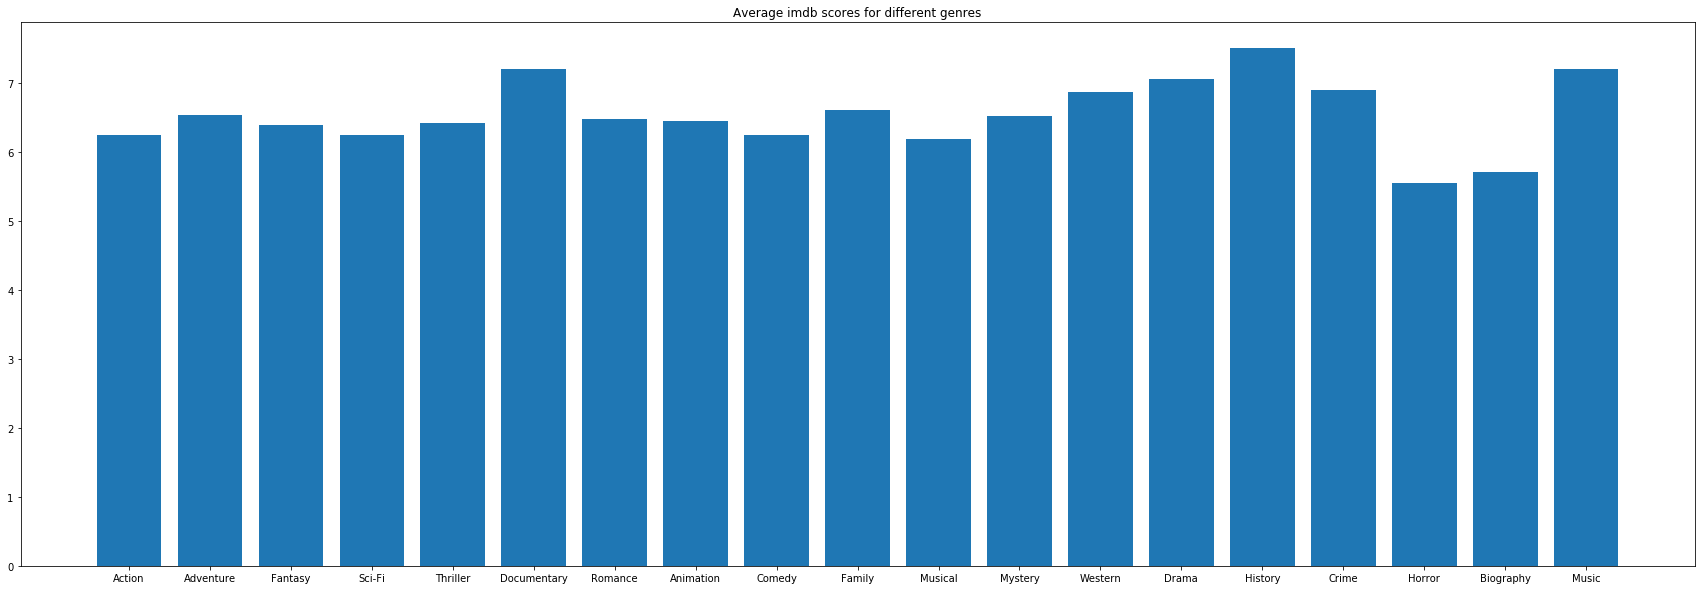

In [9]:
# Plot Avergage IMDB scores vs Movie genres
scores = [Action_score,Adventure_score,Fantasy_score,Sci_Fi_score,Thriller_score,Documentary_score,Romance_score,Animation_score,Comedy_score,Family_score,Musical_score,Mystery_score,Western_score,Drama_score,History_score,Crime_score,Horror_score,Biography_score,Music_score]
genres = ['Action','Adventure', 'Fantasy','Sci-Fi','Thriller','Documentary','Romance','Animation','Comedy','Family','Musical','Mystery','Western','Drama','History','Crime','Horror','Biography','Music']
plt.figure(figsize=(30,10))
plt.bar(genres,scores)
plt.title('Average imdb scores for different genres')
plt.show()
# No significant difference
# Drop the variable
data = data.drop('genres',axis=1)

In [10]:
# Deal with NaNs 
# Drop rows with NaNs in gross and budget columns
data.isnull().sum().sort_values(ascending=False)
data = data.dropna(subset=['gross', 'budget'])
data.shape

(3891, 27)

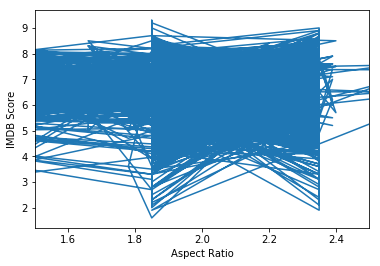

In [11]:
# Check missing values again
# Deal with Aspect_ratio NaNs
data.isnull().sum().sort_values(ascending=False)
data.aspect_ratio.describe()
data['aspect_ratio'] = data.aspect_ratio.fillna(0)

# Numbers are mostly 2.35 & 1.85
import collections
collections.Counter(data['aspect_ratio'])
# Plot to see the distribution vs imdb_score
plt.plot(data.aspect_ratio,data.imdb_score)
plt.xlabel('Aspect Ratio')
plt.ylabel('IMDB Score')
plt.xlim(1.5,2.5)
plt.show()
# No significant difference in terms of IMDB score distrubution between 2.35 and 1.85
# Drop the variable
data = data.drop('aspect_ratio',axis=1)

In [12]:
# Deal with other NaNs
# Fill in with either mean or mode
data.isnull().sum().sort_values(ascending=False)                              
data.content_rating = data.content_rating.fillna(data.content_rating.mode())
data.actor_3_facebook_likes = data.actor_3_facebook_likes.fillna(data.actor_3_facebook_likes.mean())
data.actor_2_facebook_likes = data.actor_2_facebook_likes.fillna(data.actor_2_facebook_likes.mean())
data.facenumber_in_poster = data.facenumber_in_poster.fillna(data.facenumber_in_poster.mean())
data.actor_1_facebook_likes = data.actor_1_facebook_likes.fillna(data.actor_1_facebook_likes.mean())
data.num_critic_for_reviews = data.num_critic_for_reviews.fillna(data.num_critic_for_reviews.mean())
data.duration = data.duration.fillna(data.duration.mean())
data.plot_keywords = data.plot_keywords.fillna(data.plot_keywords.mode())
data.actor_3_name = data.actor_3_name.fillna(data.actor_3_name.mode())
data.actor_2_name = data.actor_2_name.fillna(data.actor_2_name.mode())
data.actor_1_name = data.actor_1_name.fillna(data.actor_1_name.mode())
data.language = data.language.fillna(data.language.mode())
data.color = data.color.fillna(data.color.mode())


In [13]:
# According to the history of naming these different content ratings, M = GP = PG, X = NC-17. 
# So need to replace M and GP with PG, replace X with NC-17
data.content_rating[data.content_rating == 'M'] = 'PG'
data.content_rating[data.content_rating == 'GP'] = 'PG'
data.content_rating[data.content_rating == 'X'] = 'NC-17'
# We want to replace “Approved”, “Not Rated”, “Passed”, “Unrated” with the most common rating “R”
data.content_rating[data.content_rating == 'Approved']  = 'R' 
data.content_rating[data.content_rating == 'Not Rated'] = 'R' 
data.content_rating[data.content_rating == 'Passed'] = 'R' 
data.content_rating[data.content_rating == 'Unrated']  = 'R' 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages

In [14]:
# Add in column profit and return of investment
data['profit'] = data['gross'] - data['budget']
data['roi'] = (data['profit'] / data['budget']) * 100

In [15]:
# Is color column significant?
data['color'].describe()
# 95% are colored
# drop the variable
data = data.drop('color',axis=1)

# Same thing with language
# Drop language
data = data.drop('language',axis=1)

# How about country?
data['country'].describe()
# 79% movies are from USA, 8% from UK, 13% from other countries
# So we group them into USA, UK, Others
data.country[(data.country != 'USA') & (data.country != 'UK')] = 'Others'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Visulization

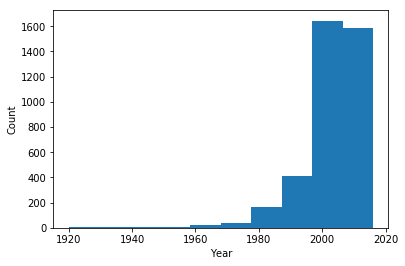

In [16]:
# Movie vs years
plt.hist(data['title_year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

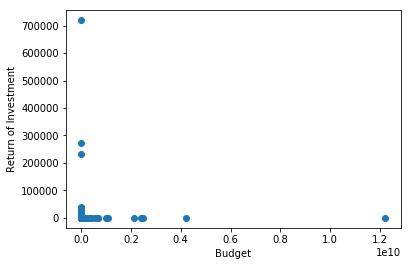

In [17]:
# Top 20 movies based on the profit
plt.scatter(data['budget'],data['roi'])
plt.xlabel('Budget')
plt.ylabel('Return of Investment')
plt.show()

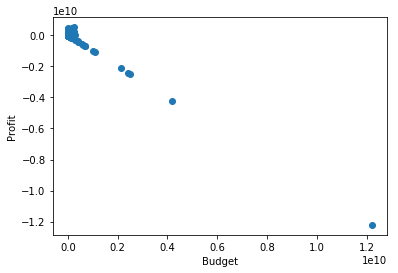

In [18]:
# Top 20 movies based on Profit
plt.scatter(data['budget'],data['profit'])
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()

In [19]:
# Top 20 directors with highest IMDB scores
a = data['imdb_score'].sort_values(ascending=False)[:20].index.values.tolist()
list = []
for i in range(len(a)):
    list.append(data.iloc[i]['director_name'])
    
pd.Series(data['imdb_score'].sort_values(ascending=False)[:20].values,list)

James Cameron        9.3
Gore Verbinski       9.2
Sam Mendes           9.0
Christopher Nolan    9.0
Andrew Stanton       8.9
Sam Raimi            8.9
Nathan Greno         8.9
Joss Whedon          8.9
David Yates          8.8
Zack Snyder          8.8
Bryan Singer         8.8
Marc Forster         8.8
Gore Verbinski       8.8
Gore Verbinski       8.7
Zack Snyder          8.7
Andrew Adamson       8.7
Joss Whedon          8.7
Rob Marshall         8.7
Barry Sonnenfeld     8.7
Peter Jackson        8.7
dtype: float64

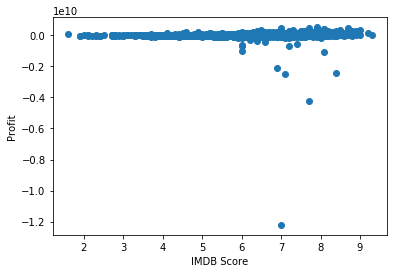

In [20]:
# IMDB score vs Profit
plt.scatter(data['imdb_score'],data['profit'])
plt.xlabel('IMDB Score')
plt.ylabel('Profit')
plt.show()

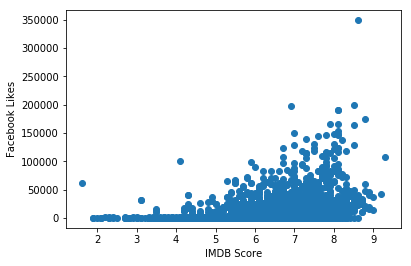

In [21]:
# IMDB score vs Facebook Likes
plt.scatter(data['imdb_score'],data['movie_facebook_likes'])
plt.xlabel('IMDB Score')
plt.ylabel('Facebook Likes')
plt.show()

In [22]:
# Remove names since they are so different
data = data.drop(['director_name', 'actor_2_name', 'actor_1_name','movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link'],axis=1)

## Reduce Multicollinearity

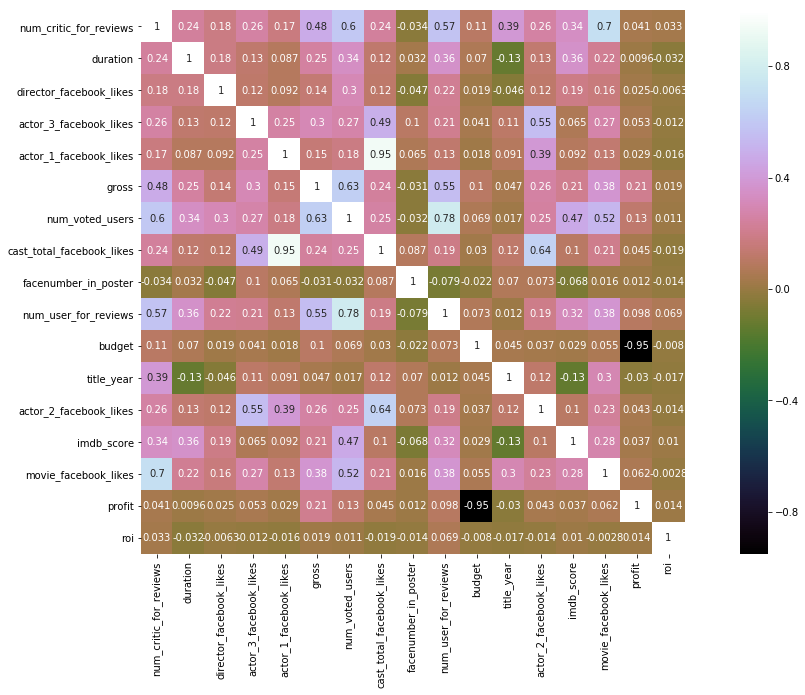

In [23]:
# Heatmap
corr_mat=data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
# High correlation cut-off 0.50
# From heatmap, Remove profit since it is highly reversly corelated with budget
data = data.drop('profit',axis=1)
# actor_1_facebook_likes highly correlated with total_cast_facebook_like
data['other_actors_fb_like'] = data['actor_3_facebook_likes'] + data['actor_2_facebook_likes']
data = data.drop(['actor_3_facebook_likes','actor_2_facebook_likes','cast_total_facebook_likes'],axis=1)
# Strong correlation here as well
data = data.drop('num_voted_users',axis=1)
# critic_review_ratio
data['critic_review_ratio'] =  data.num_critic_for_reviews / data.num_user_for_reviews
data = data.drop(['num_critic_for_reviews','num_user_for_reviews'],axis=1)

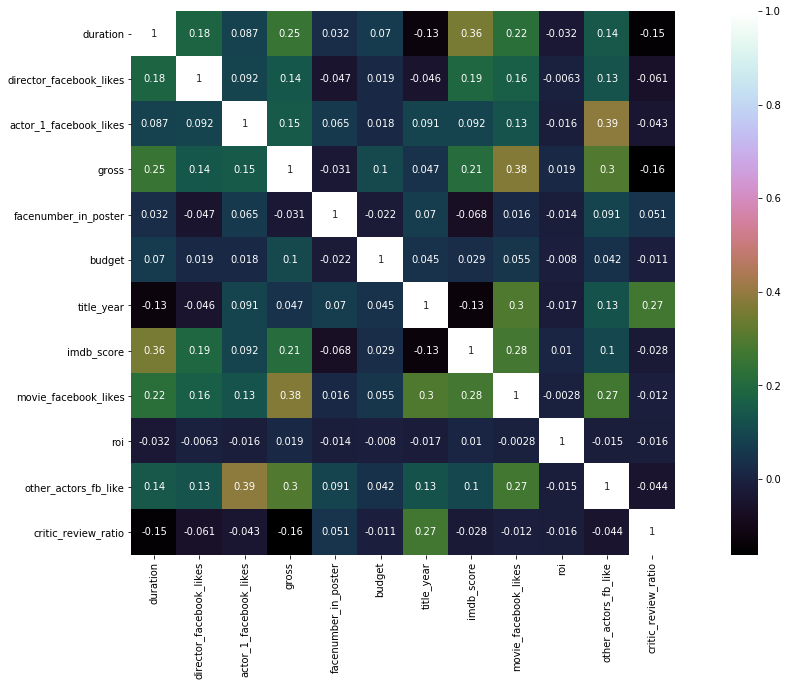

In [24]:
# Check new heatmap again
corr_mat=data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

## Train & Test Split

In [25]:
y = data['imdb_score']
x = pd.get_dummies(data=data, columns=['country', 'content_rating'])
x = x.drop('imdb_score',axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Variables Deduction

In [26]:
# VIF variable reductions
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif
# Drop all countries & content_rating_PG & content_rating_PG-13 & content_rating_R
x =  x.drop(['country_Others','country_UK','country_USA','content_rating_PG-13','content_rating_R','content_rating_PG'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Linear Regression

In [27]:
# Fit Model
model = sm.OLS(y_train, X_train)       
result = model.fit()      
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     9287.
Date:                Mon, 17 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:28:44   Log-Likelihood:                -3564.9
No. Observations:                2606   AIC:                             7156.
Df Residuals:                    2593   BIC:                             7232.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
duration                    0.0149      0.001     17.056      0.000       0.013       0.017
director_facebook_likes  3.241e-05   6.25e-06      5.185      0.000    2.02e-05    4.47e-05
actor_1_facebook_likes   1.815e-06   1.15e-06      1.575      0.115   -4.45e-07    4.07e-06
gross                    1.021e-09   3.22e-10      3.169      0.002    3.89e-10    1.65e-09
facenumber_in_poster       -0.0266      0.009     -2.804      0.005      -0.045      -0.008
budget                   -1.82e-11   7.06e-11     -0.258      0.797   -1.57e-10     1.2e-10
title_year                  0.0023   5.02e-05     46.223      0.000       0.002       0.002
movie_facebook_likes     8.237e-06   1.01e-06      8.168      0.000    6.26e-06    1.02e-05
roi                       1.44e-06   1.24e-06      1.165      0.244   -9.84e-07    3.86e-06
other_actors_fb_like    -5.243e-06   4.04e-06     -1.297      0.195   -1.32e-05    2.68e-06
critic_review_ratio         0.0681      0.023      2.950      0.003       0.023       0.113
content_rating_G            0.4467      0.124      3.605      0.000       0.204       0.690
content_rating_NC-17        0.7351      0.338      2.175      0.030       0.072       1.398
==============================================================================
Omnibus:                      221.988   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.028
Skew:                          -0.688   Prob(JB):                     2.89e-68
Kurtosis:                       3.984   Cond. No.                     4.89e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
y_pred = result.predict(X_test)
rmse(y_pred,y_test)

0.9623773215350301

## Random Forest

In [39]:
# Fit model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
# RMSE
predictions = rf.predict(X_test)
rmse(predictions,y_test)

Mean Absolute Error: 0.55 degrees.


In [31]:
# Performance Matrix
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.1 %.


## Gradient Boosted Trees with XGBoost 

In [36]:
# Fit Model
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
# RMSE
predictions1 = gbm.predict(X_test)
rmse(predictions1,y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9668191659306787

In [38]:
# Performance Matrix
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.64 %.


## Thus, complex models don't necessarily have better performance.